In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
print("yes")

yes


In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/projectone/archive/Multi_Label_dataset/train1.csv')
imgsize = 120
print(df.shape[0])
X = []
for i in tqdm(range(df.shape[0])):
    path = 'C:/Users/hp/Desktop/projectone/archive/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg'
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(imgsize,imgsize))
    X.append(img)

X = np.array(X)
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
print("yes")

  0%|          | 0/7254 [00:00<?, ?it/s]

7254


100%|██████████| 7254/7254 [02:35<00:00, 46.53it/s]


yes


In [3]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(imgsize,imgsize,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Train on 6528 samples, validate on 726 samples
Epoch 1/10
6528/6528 [==============================] - 41s 6ms/sample - loss: 0.5979 - accuracy: 0.7234 - val_loss: 0.3219 - val_accuracy: 0.9066
Epoch 2/10
6528/6528 [==============================] - 16s 2ms/sample - loss: 0.2702 - accuracy: 0.9073 - val_loss: 0.3570 - val_accuracy: 0.8829
Epoch 3/10
6528/6528 [==============================] - 16s 2ms/sample - loss: 0.2479 - accuracy: 0.9113 - val_loss: 0.2679 - val_accuracy: 0.9068
Epoch 4/10
6528/6528 [==============================] - 16s 2ms/sample - loss: 0.2397 - accuracy: 0.9128 - val_loss: 0.6048 - val_accuracy: 0.8702
Epoch 5/10
6528/6528 [==============================] - 16s 2ms/sample - loss: 0.2347 - accuracy: 0.9143 - val_loss: 0.6090 - val_accuracy: 0.8786
Epoch 6/10
6528/6528 [==============================] - 16s 2ms/sample - loss: 0.2301 - accuracy: 0.9146 - val_loss: 0.2414 - val_accuracy: 0.9127
Epoch 7/10
6528/6528 [==============================] - 16s 2ms/sample 

In [4]:
er,ac=model.evaluate(X_test,y_test)
print(er,ac)

726/726 [==============================] - 1s 1ms/sample - loss: 0.2435 - accuracy: 0.9132
0.24353199417269264 0.913223


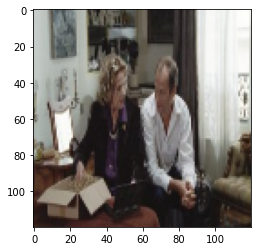

Action 28
Adventure 6
Animation 0
Biography 14
Comedy 7
Crime 24
Documentary 10
Drama 67
Family 0
Fantasy 4
History 4
Horror 6
Music 2
Musical 0
Mystery 11
N/A 0
News 0
Reality-TV 0
Romance 9
Sci-Fi 5
Short 1
Sport 2
Thriller 27
War 4
Western 0


In [5]:
f=df.columns[2:27]
f=np.array(f)

im=100

x=X_test[im].reshape(1,imgsize,imgsize,3)
p=model.predict(x)
plt.imshow(X_test[im].reshape(imgsize,imgsize,3))
plt.show()
p=p[0]
for i in range(len(p)):
        print(f[i],int(p[i]*100))
                